<a href="https://colab.research.google.com/github/Jonny-T87/Dojo-Work/blob/main/Regression_Tree_Exercise_(Practice).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Jonny Tesfahun
- 07/01/22

Task:

1. Run a regression tree model with default parameters (unlimited depth)

2. Determine the depth of the default tree.

3. Try different values for max_depth and determine the optimal value based on the best (highest) r2 value. What is the optimal max_depth based on your trials?

4. What is the r2 of your final model on the training set and on the test set?

In [68]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import plot_tree
from sklearn import set_config
set_config(display='diagram')

In [69]:
# Create a function to take the true and predicted labels and print MAE, MSE, RMSE, and R2 metrics
def evaluate_regression(y_true, y_pred):
  """Takes true target and predicted target and prints MAE, MSE, RMSE and R2"""
  
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_true, y_pred)

  print(f'scores: \nMAE: {mae:,.2f} \nMSE: {mse:,.2f} \nRMSE: {rmse:,.2f} \nR2: {r2:.2f}')

In [70]:
df = pd.read_csv('/content/drive/MyDrive/DojoBootCamp/Project Files/Boston_Housing_from_Sklearn.csv')

In [71]:
df.head()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2


In [72]:
df.corr()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
CRIM,1.000000,0.420972,-0.219247,0.352734,0.289946,0.455621,-0.388305
NOX,0.420972,1.000000,-0.302188,0.731470,0.188933,0.590879,-0.427321
RM,-0.219247,-0.302188,1.000000,-0.240265,-0.355501,-0.613808,0.695360
AGE,0.352734,0.731470,-0.240265,1.000000,0.261515,0.602339,-0.376955
PTRATIO,0.289946,0.188933,-0.355501,0.261515,1.000000,0.374044,-0.507787
LSTAT,0.455621,0.590879,-0.613808,0.602339,0.374044,1.000000,-0.737663
PRICE,-0.388305,-0.427321,0.695360,-0.376955,-0.507787,-0.737663,1.000000


In [73]:
# Validation Split features and target 
X = df.drop(columns=['PRICE','CRIM','NOX','AGE'])
y = df['PRICE']
# Also Train test split the data to prepare for machine learning.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [74]:
X_train

,RM,PTRATIO,LSTAT
182,7.155,17.8,4.82
155,6.152,14.7,15.02
280,7.820,14.9,3.76
126,5.613,19.1,27.26
329,6.333,16.9,7.34
...,...,...,...
106,5.836,20.9,18.66
270,5.856,18.6,13.00
348,6.635,17.0,5.99
435,6.629,20.2,23.27


In [75]:
# Make an instance of the Model
# By leaving the parenthesis empty, we are choosing to use all of the default parameters
# So you get the same results, let's set our random_state to the same number
dec_tree = DecisionTreeRegressor(max_depth=6, random_state = 42)

In [76]:
#Fitting decision tree regressor to train data
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, random_state=42)

In [77]:
#Predict target values for training and test set
train_preds = dec_tree.predict(X_train)
test_preds = dec_tree.predict(X_test)

In [78]:
# evaluate the model predictions
train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test, y_test)
print(train_score)
print(test_score)

0.9214827076541541
0.7200322619567403


In [79]:
#Getting parameters, depth of default tree is None
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [80]:
# use a for loop to try many values at once and compare them
# List of values to try for max_depth:
depths = list(range(2, 30)) # will try every value between 2 and 30
# Data frame to store the score for each value of max_depth:
scores = pd.DataFrame(index=depths, columns=['Test Score','Train Score'])
for depth in depths:
    dec_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dec_tree.fit(X_train, y_train)
    train_score = dec_tree.score(X_test, y_test)
    test_score = dec_tree.score(X_test, y_test)
    scores.loc[depth, 'Train Score'] = train_score
    scores.loc[depth, 'Test Score'] = test_score

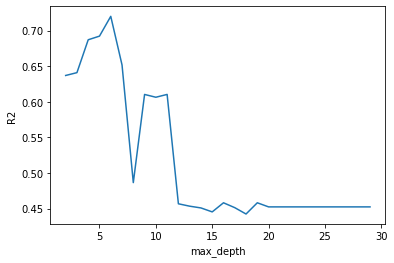

In [81]:
#ploting scores
plt.plot(depths, scores['Test Score'])
plt.xlabel('max_depth')
plt.ylabel('R2');

In [82]:
# let's check by sorting our dataframe to find the depth for the best score
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()

,Test Score,Train Score
6,0.720032,0.720032
5,0.692269,0.692269
4,0.68715,0.68715
7,0.651788,0.651788
3,0.641014,0.641014


Best prediction score for test data and training data is a depth of 6 using regression tree model.

In [83]:
#r2 of the final model
train_r2 = r2_score(y_train, train_preds)
test_r2 = r2_score(y_test, test_preds)
print(f'Model Training R2: {train_r2}')
print(f'Model Testing R2: {test_r2}')

Model Training R2: 0.9214827076541541
Model Testing R2: 0.7200322619567403
